# HW 7—James Camacho

Consider the boundary value problem,

$$\epsilon u'' + 2u'u = 0, u(0) = \alpha, u(1) = \beta$$

For this system, carry out the analysis of section 2.17.1 to determine for which values of $\alpha$
and $\beta$ there is an interior layer. What is $\bar{x}$ for the interior layer?

-----
As $\epsilon\to 0$, the differential equation becomes $2u'u = 0\Longleftrightarrow (u^2)' = 0$, so $u$ is constant. If we take the left boundary condition, we get $u=\alpha$, and if we take the right boundary condition we get $u = \beta$. Of course, when $\alpha\ne\beta$ we can't have both, we need some intermediate layer.

Let $u(x) = W\left(\frac{x-\bar{x}}{\epsilon^k}\right)$, and $x = \xi\cdot \epsilon^k + \bar{x}$ so that

$$u(x) = W(\xi).$$

Plugging this into the differential equation gives

$$W''(\xi) + 2\epsilon^{k-1}W'(\xi)W(\xi) = 0.$$

We use $k=1$ to maximize information, giving $W + 2W'W = 0.$ My attempt at finding the solution by hand failed, so I plugged it into WolframAlpha and got

$$W(\xi) = \pm w_0\tanh(w_0\xi).$$

(Sure, you can add another constant inside the $\tanh$, but that would be the same as moving $\bar{x}$. Also, I should add that it is $+$ when $\beta > \alpha$ and $-$ when $\beta < \alpha$.)

As $\epsilon\to 0$ for any $x < \bar{x}$ we get $\xi \to -\infty$, so the left boundary condition on $W$ is

$$\lim_{\xi\to -\infty}W(\xi) = w_0 = \alpha.$$

Similarly the right boundary condition is

$$\lim_{\xi\to\infty}W(\xi) = w_0 = \beta.$$

Therefore there is an interior layer only when $\alpha + \beta = 0,$ and we get $w_0 = \beta$. Now we plug in $x$ for $\xi$:

$$u(x) = W(\xi) = \pm \beta\tanh\left(\beta\cdot\frac{x-\bar{x}}{\epsilon}\right)$$

We define a new variable $y(x) = \bar{x} + x\cdot \frac{\epsilon}{\beta}$ so that

$$u(y(x)) = \pm\beta\tanh(x) = \mp\beta\tanh (-x) = -u(y(-x))\implies u(y(x)) + u(y(-x)) = 0.$$

But recall that $u(0) + u(1) = -\beta + \beta = 0$, and as

$$y\left(-\bar{x}\cdot \frac{\beta}{\epsilon}\right) = 0,$$

this means

$$1 = y\left(-\left(-\bar{x}\cdot\frac{\beta}{\epsilon}\right)\right)$$

i.e.

$$1 = \bar{x} + \bar{x}\implies \bar{x}=\frac12$$


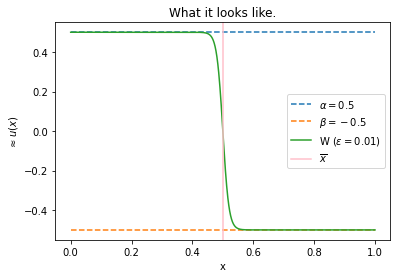

In [56]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.5
beta = -alpha
eps = 0.01
xbar = 0.5
c = beta

x = np.linspace(0, 1, 1000)

plt.plot(x, np.full_like(x, alpha), linestyle="--", label=r"$\alpha"+f"={alpha}$")
plt.plot(x, np.full_like(x, beta), linestyle="--", label=r"$\beta"+f"={beta}$")

xi = (x-xbar)/eps
W = c**2/abs(c) * np.tanh(c*xi)

plt.plot(x, W, label=r"W ($\epsilon="+f"{eps}$)")
plt.axvline(xbar, label=r"$\overline{x}$", color="pink")

plt.title("What it looks like.")
plt.xlabel("x")
plt.ylabel(r"$\approx u(x)$")
plt.legend()
plt.show();